# Wild Blueberry Yield prediction: Using Multiple Linear Regression Models.

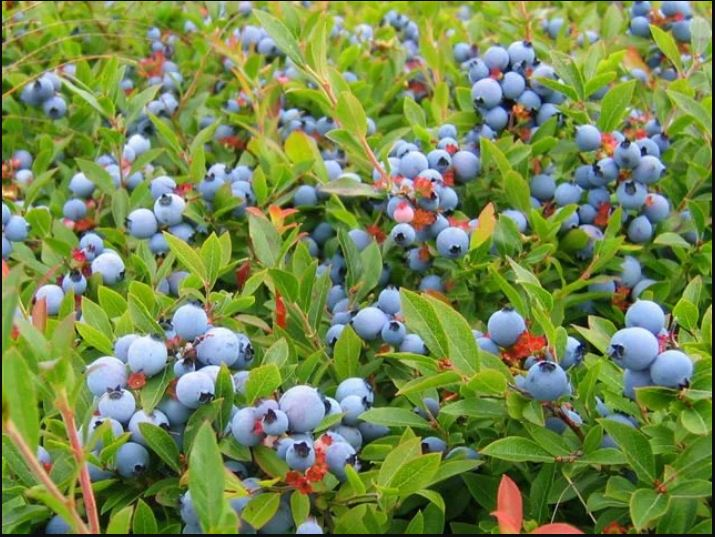

## Importing the dataset

In [1]:
data <- read.csv("WildBlueberryPollinationSimulationData.csv")

## Viewing the dataset

In [2]:
head(data) 

Row.,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30,50.8,16,0.26,0.4106521,0.4081590,31.67890,3813.166
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30,50.8,1,0.10,0.4442544,0.4254576,33.44938,4947.606
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33,55.9,16,0.26,0.3837865,0.3991724,30.54631,3866.799
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33,55.9,1,0.10,0.4075642,0.4087893,31.56259,4303.943
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30,50.8,24,0.39,0.3544130,0.3827029,28.87371,3436.494
5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30,50.8,34,0.56,0.3096695,0.3662835,27.34545,2825.004


In [3]:
str(data)

'data.frame':	777 obs. of  18 variables:
 $ Row.                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ clonesize           : num  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ honeybee            : num  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 ...
 $ bumbles             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ andrena             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ osmia               : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ MaxOfUpperTRange    : num  86 86 94.6 94.6 86 86 94.6 94.6 77.4 77.4 ...
 $ MinOfUpperTRange    : num  52 52 57.2 57.2 52 52 57.2 57.2 46.8 46.8 ...
 $ AverageOfUpperTRange: num  71.9 71.9 79 79 71.9 71.9 79 79 64.7 64.7 ...
 $ MaxOfLowerTRange    : num  62 62 68.2 68.2 62 62 68.2 68.2 55.8 55.8 ...
 $ MinOfLowerTRange    : num  30 30 33 33 30 30 33 33 27 27 ...
 $ AverageOfLowerTRange: num  50.8 50.8 55.9 55.9 50.8 50.8 55.9 55.9 45.8 45.8 ...
 $ RainingDays         : num  16 

In [24]:
library(dplyr)
#library(tidyverse) # load Tidyverse
#library(ggplot2) # load ggplot2

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Remove the following columns:
Row., fruitset, fruitmass, seeds.\
The above variables are not in the interest of study.

In [25]:
df <- data %>%
select(-c(Row., fruitset, fruitmass,seeds))

In [26]:
str(df)

'data.frame':	777 obs. of  14 variables:
 $ clonesize           : num  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ honeybee            : num  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 ...
 $ bumbles             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ andrena             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ osmia               : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ MaxOfUpperTRange    : num  86 86 94.6 94.6 86 86 94.6 94.6 77.4 77.4 ...
 $ MinOfUpperTRange    : num  52 52 57.2 57.2 52 52 57.2 57.2 46.8 46.8 ...
 $ AverageOfUpperTRange: num  71.9 71.9 79 79 71.9 71.9 79 79 64.7 64.7 ...
 $ MaxOfLowerTRange    : num  62 62 68.2 68.2 62 62 68.2 68.2 55.8 55.8 ...
 $ MinOfLowerTRange    : num  30 30 33 33 30 30 33 33 27 27 ...
 $ AverageOfLowerTRange: num  50.8 50.8 55.9 55.9 50.8 50.8 55.9 55.9 45.8 45.8 ...
 $ RainingDays         : num  16 1 16 1 24 34 24 34 16 1 ...
 $ AverageRainingDays  : n

## Checking missing values in any rows
There are no missing values in our dataset.

In [27]:
sum(is.na(df)) 

[1] 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


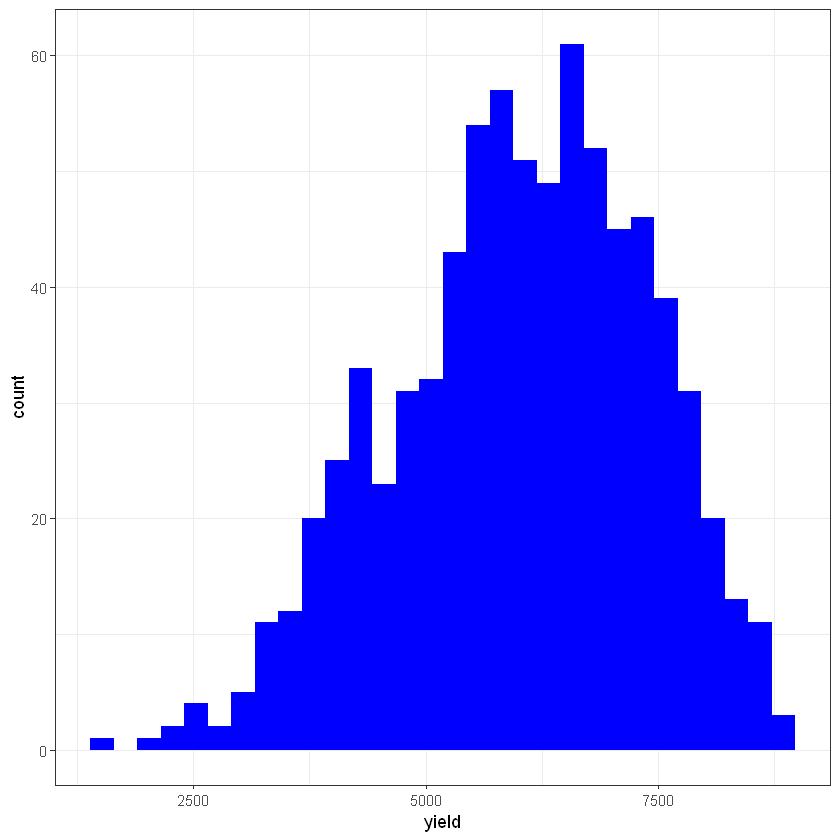

In [28]:
ggplot(data = df, aes(x = yield))+
geom_histogram(fill = 'blue')+
 theme_bw()

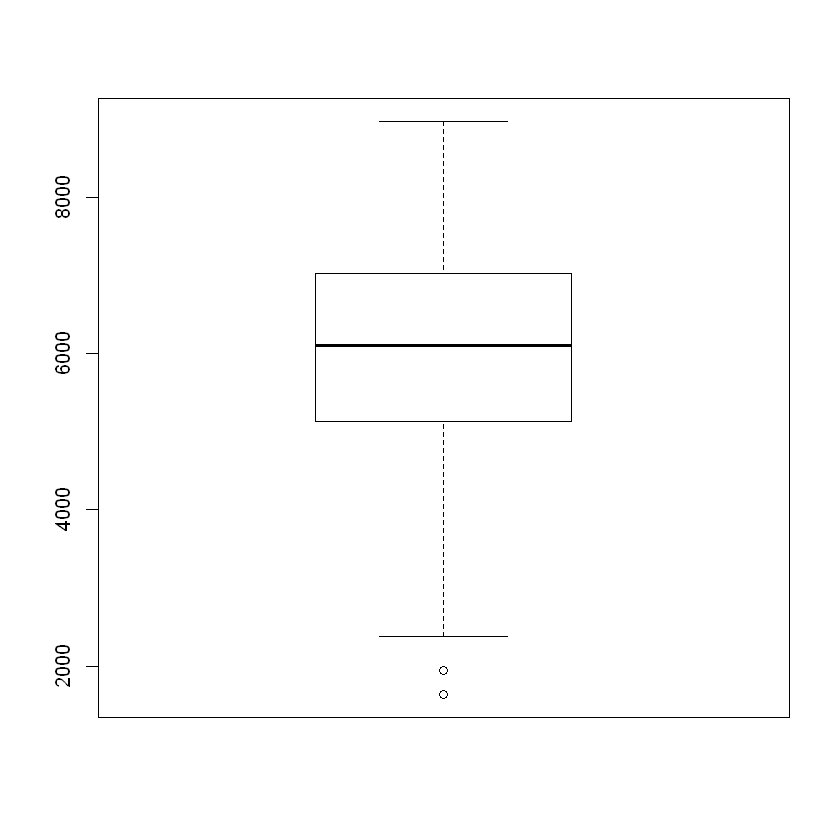

In [198]:
boxplot(df$yield)

## Summary of Bluberry Yield Dataset

In [200]:
summary(df)

   clonesize        honeybee          bumbles          andrena      
 Min.   :10.00   Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:12.50   1st Qu.: 0.2500   1st Qu.:0.2500   1st Qu.:0.3800  
 Median :12.50   Median : 0.2500   Median :0.2500   Median :0.5000  
 Mean   :18.77   Mean   : 0.4171   Mean   :0.2824   Mean   :0.4688  
 3rd Qu.:25.00   3rd Qu.: 0.5000   3rd Qu.:0.3800   3rd Qu.:0.6300  
 Max.   :40.00   Max.   :18.4300   Max.   :0.5850   Max.   :0.7500  
     osmia        MaxOfUpperTRange MinOfUpperTRange AverageOfUpperTRange
 Min.   :0.0000   Min.   :69.70    Min.   :39.0     Min.   :58.20       
 1st Qu.:0.5000   1st Qu.:77.40    1st Qu.:46.8     1st Qu.:64.70       
 Median :0.6300   Median :86.00    Median :52.0     Median :71.90       
 Mean   :0.5621   Mean   :82.28    Mean   :49.7     Mean   :68.72       
 3rd Qu.:0.7500   3rd Qu.:89.00    3rd Qu.:52.0     3rd Qu.:71.90       
 Max.   :0.7500   Max.   :94.60    Max.   :57.2     Max.   :79.00       
 MaxOf

`geom_smooth()` using formula 'y ~ x'


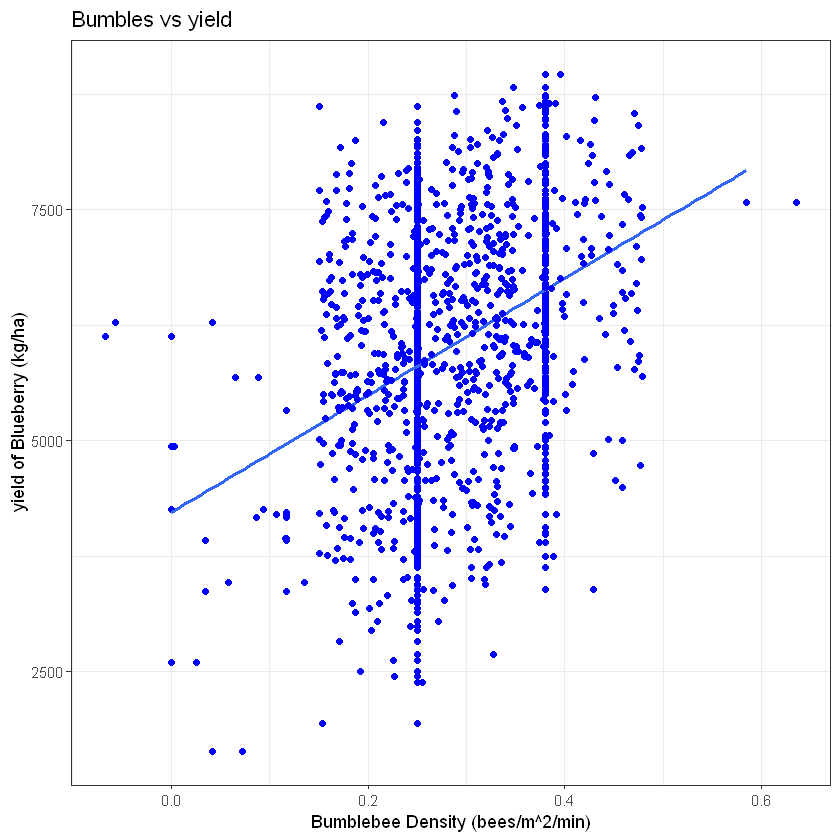

In [204]:
# scatter plot between bumbles vs yield
ggplot(data = df, aes(x = bumbles, y = yield, ))+
geom_point(color = 'blue')+
geom_smooth(method = 'lm', se = F)+
geom_jitter(color = 'blue', width = 0.1, height = 0.1)+
theme_bw()+
labs(title="Bumbles vs yield",
        x ="Bumblebee Density (bees/m^2/min)", y = "yield of Blueberry (kg/ha)")


`geom_smooth()` using formula 'y ~ x'


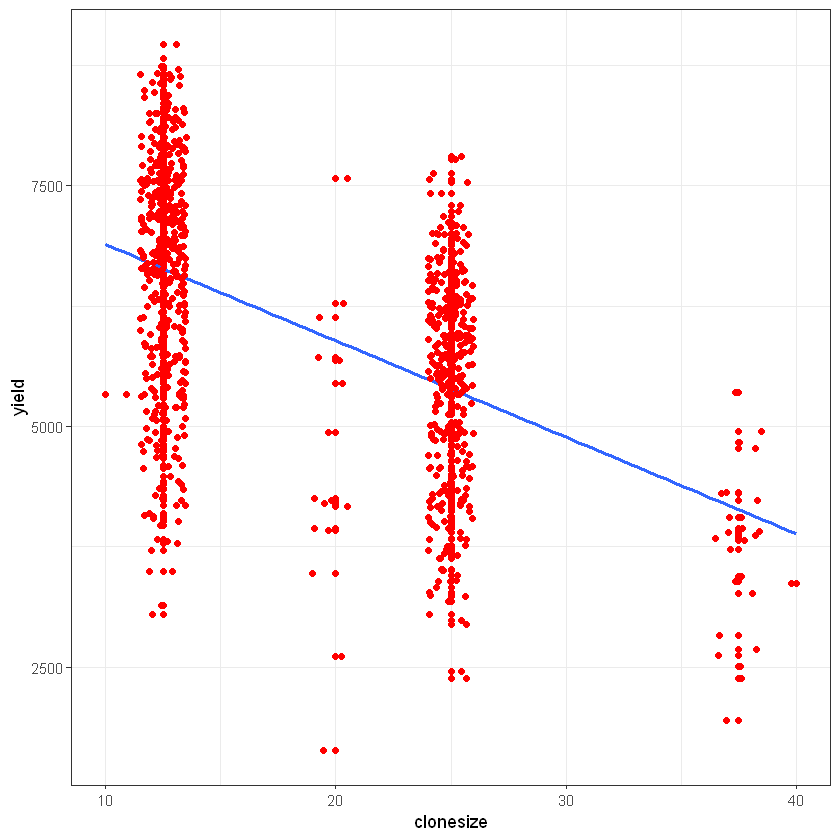

In [31]:
# scatter plot between clonesize vs yield
ggplot(data = df, aes(x = clonesize, y = yield))+
geom_point(color = 'red')+
geom_smooth(method = 'lm', se=F)+
geom_jitter(color ='red')+
theme_bw()

### Smaller the clone size bigger the blueberry yield!

`geom_smooth()` using formula 'y ~ x'


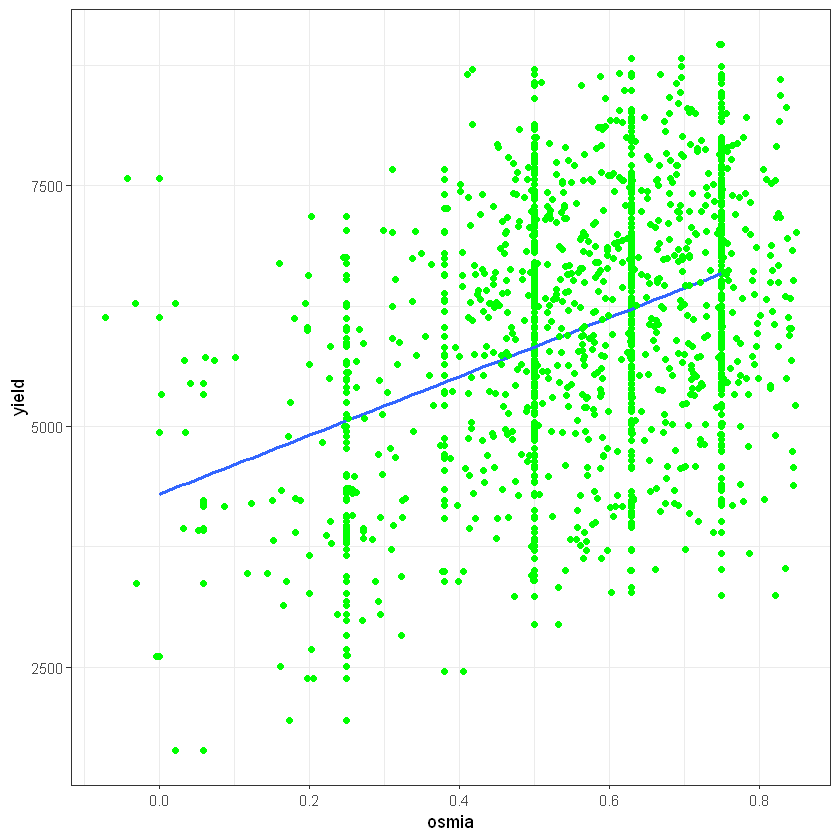

In [32]:
# scatter plot between Osmia vs yield
ggplot(data = df, aes(x = osmia, y = yield))+
geom_point(color = 'green')+
geom_smooth(method = 'lm', se=F)+
geom_jitter(color = 'green', width =0.1,height = 0.1)+
theme_bw()

#### Higher the density of Osmia bees then increases the blueberry yield.

`geom_smooth()` using formula 'y ~ x'


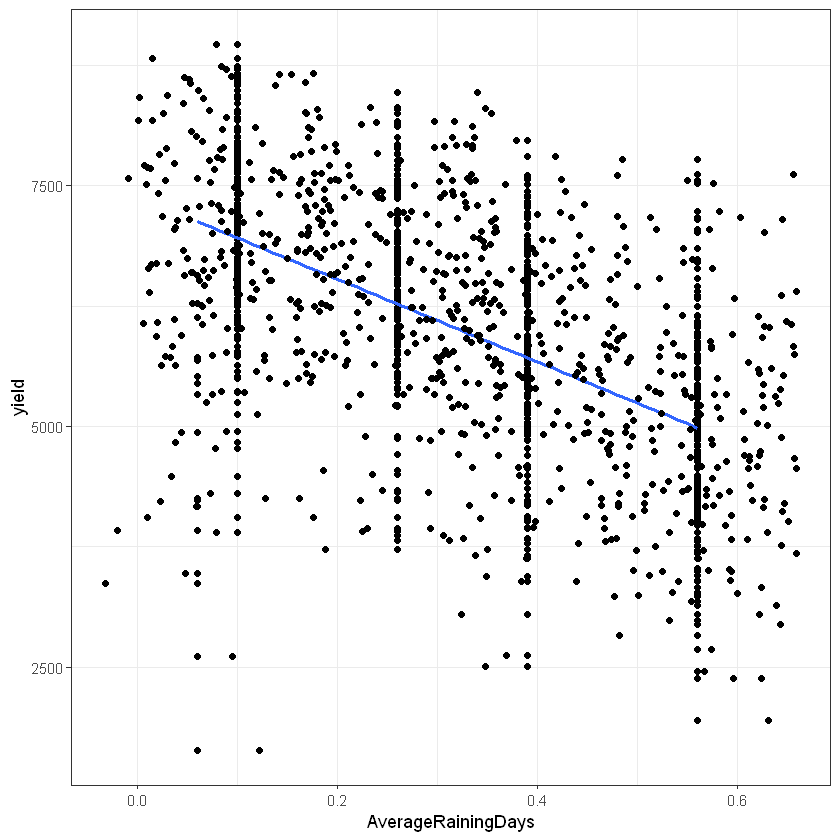

In [33]:
# scatter plot between Average Rainning Days vs yield
ggplot(data = df, aes(x = AverageRainingDays, y = yield))+
geom_point()+
geom_smooth(method = 'lm', se=F)+
geom_jitter(width =0.1,height = 0.1)+
theme_bw()

`geom_smooth()` using formula 'y ~ x'


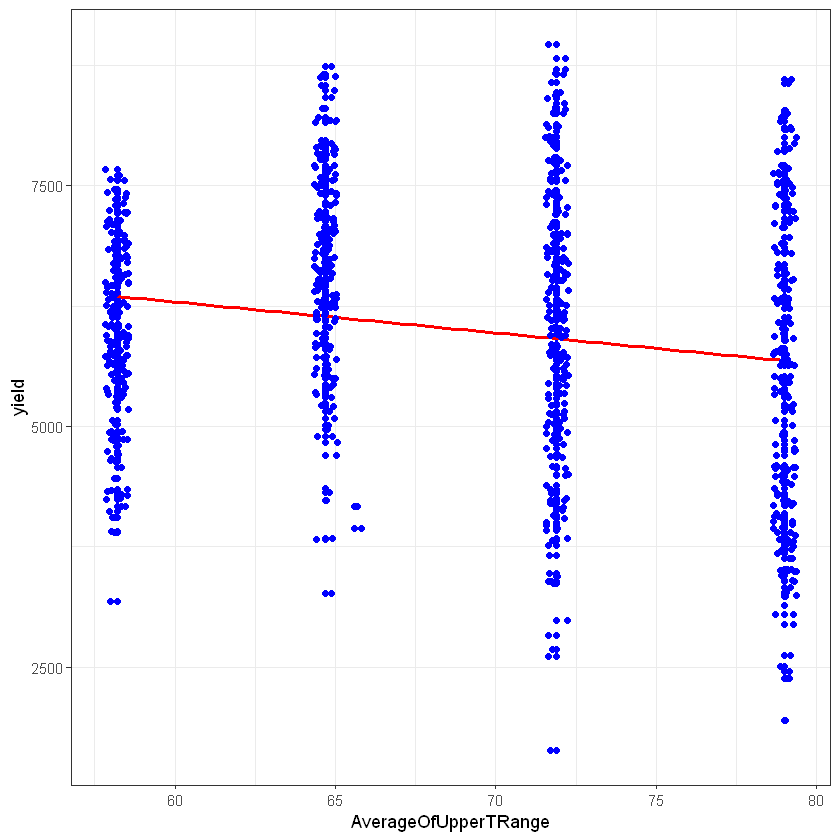

In [34]:
# scatter plot between AverageOfUpperTRange  vs yield
ggplot(data = df, aes(x = AverageOfUpperTRange, y = yield))+
geom_point(color = 'blue')+
geom_smooth(method = 'lm', se=F,color = 'red')+
geom_jitter(color = 'blue')+
theme_bw()


### there is slightly negative corelation.

### As temperature increases and Ranning days increases then blueberry yield decreases.
### Also, cold dry condition seems to be more favorable condition to increase the yeild of blueberry. 

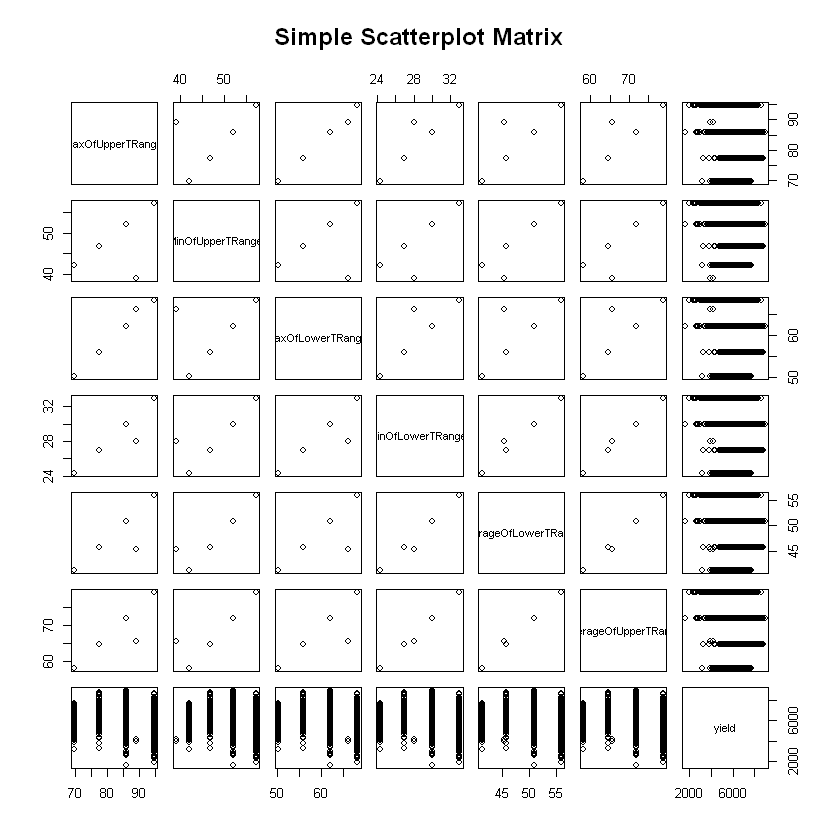

In [41]:
pairs(~MaxOfUpperTRange+MinOfUpperTRange+MaxOfLowerTRange+MinOfLowerTRange+AverageOfLowerTRange+AverageOfUpperTRange+yield,
      main="Simple Scatterplot Matrix", data = df) 

### It is very obvious that all of the features related to temperature are highly correlated. Therefore, we have serious issue of multicollinearity. We must remove some of these variables in order to address this issue so that the performance of our models will not be hampered by such effect. we will apply different feature selections techniques to overcome this issue. *Note: AverageRainingDays and RanningDays are also highly corelated to each other.

In [42]:
# Lets split our data into train and test to overcome overfitting or bias in Model building process.
# Since our dataset has only 777 observations, we will use 80% for train and 20% for test
# install.packages('rsample')
library(rsample)

In [43]:
# Train-Test Split
set.seed(602)

df_split <- initial_split(df, prop = 0.8)

df_train <- training(df_split)
df_test <- testing(df_split)


In [44]:
# install.packages('MASS')
library(MASS)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [47]:
#install.packages('car')
library(car)

In [49]:
# Feature Selections
# Forward Feature Selection
lm1 = lm( yield ~., data = df_train)
summary(lm1)

lm2 = lm(yield ~ 1, data = df_train)
summary(lm2)

stepAIC(lm2, scope = list(upper = lm1, lower = ~1), direction = "forward", 
        trace = FALSE)$anova # forward selection using AIC



Call:
lm(formula = yield ~ ., data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2789.90  -283.22    37.94   293.25  1075.15 

Coefficients: (2 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           11667.884    428.234  27.247  < 2e-16 ***
clonesize               -97.027      2.596 -37.382  < 2e-16 ***
honeybee                113.930     17.567   6.485 1.83e-10 ***
bumbles                6260.478    292.684  21.390  < 2e-16 ***
andrena                 556.373    122.530   4.541 6.76e-06 ***
osmia                  2243.512    124.937  17.957  < 2e-16 ***
MaxOfUpperTRange     -19242.040   1176.412 -16.357  < 2e-16 ***
MinOfUpperTRange       2081.430    704.023   2.956  0.00323 ** 
AverageOfUpperTRange   1366.587    868.395   1.574  0.11608    
MaxOfLowerTRange      23273.065   1834.620  12.685  < 2e-16 ***
MinOfLowerTRange             NA         NA      NA       NA    
AverageOfLowerTRange    


Call:
lm(formula = yield ~ 1, data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4370.4  -857.2   109.4   986.2  2961.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6008.10      54.15     111   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1349 on 620 degrees of freedom


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,620,1128873865,8952.569
+ RainingDays,1,326027382.7,619,802846482,8742.925
+ clonesize,1,308933771.1,618,493912711,8443.240
+ osmia,1,149389764.3,617,344522947,8221.557
+ bumbles,1,72312459.9,616,272210487,8077.259
+ MaxOfUpperTRange,1,24941412.3,615,247269075,8019.582
+ AverageRainingDays,1,20907243.0,614,226361832,7966.721
+ honeybee,1,8223601.0,613,218138231,7945.741
+ andrena,1,3096692.4,612,215041538,7938.862
+ MaxOfLowerTRange,1,1255147.0,611,213786391,7937.226


In [50]:
# Lets run the model using Forward selection variables
lmf = lm( yield ~.-AverageOfUpperTRange-MinOfUpperTRange, data = df_train)
summary(lmf)


Call:
lm(formula = yield ~ . - AverageOfUpperTRange - MinOfUpperTRange, 
    data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2789.90  -283.22    37.94   293.25  1075.15 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           12624.495    398.596  31.672  < 2e-16 ***
clonesize               -97.027      2.596 -37.382  < 2e-16 ***
honeybee                113.930     17.567   6.485 1.83e-10 ***
bumbles                6260.478    292.684  21.390  < 2e-16 ***
andrena                 556.373    122.530   4.541 6.76e-06 ***
osmia                  2243.512    124.937  17.957  < 2e-16 ***
MaxOfUpperTRange     -23580.928   1216.442 -19.385  < 2e-16 ***
MaxOfLowerTRange      24876.242   1201.940  20.697  < 2e-16 ***
MinOfLowerTRange      18290.180   2440.760   7.494 2.37e-13 ***
AverageOfLowerTRange  -1366.587    868.395  -1.574  0.11608    
RainingDays              41.665     11.539   3.611  0.00033 ***
AverageRainingDays

In [53]:
# Predict lmf in test set
df_test_lmf <- df_test %>% 
  mutate(predicted_yield = predict(lmf, newdata = df_test))

In [54]:
head(df_test_lmf)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,yield,predicted_yield
7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24,0.39,2625.269,2365.112
13,37.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1,0.10,4768.594,4212.465
15,37.5,0.25,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1,0.10,3900.344,3550.130
23,37.5,0.25,0.25,0.25,0.25,69.7,42.1,58.2,50.2,24.3,41.2,1,0.10,4051.551,3907.146
26,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16,0.26,4503.162,4836.334
27,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1,0.10,5126.993,5425.305


In [57]:
# Calculate RMSE for model evaluation:

#install.packages("yardstick")
#library(yardstick)
rmse(df_test_lmf, yield, predicted_yield) # root mean sum of squares error

.metric,.estimator,.estimate
rmse,standard,434.1796


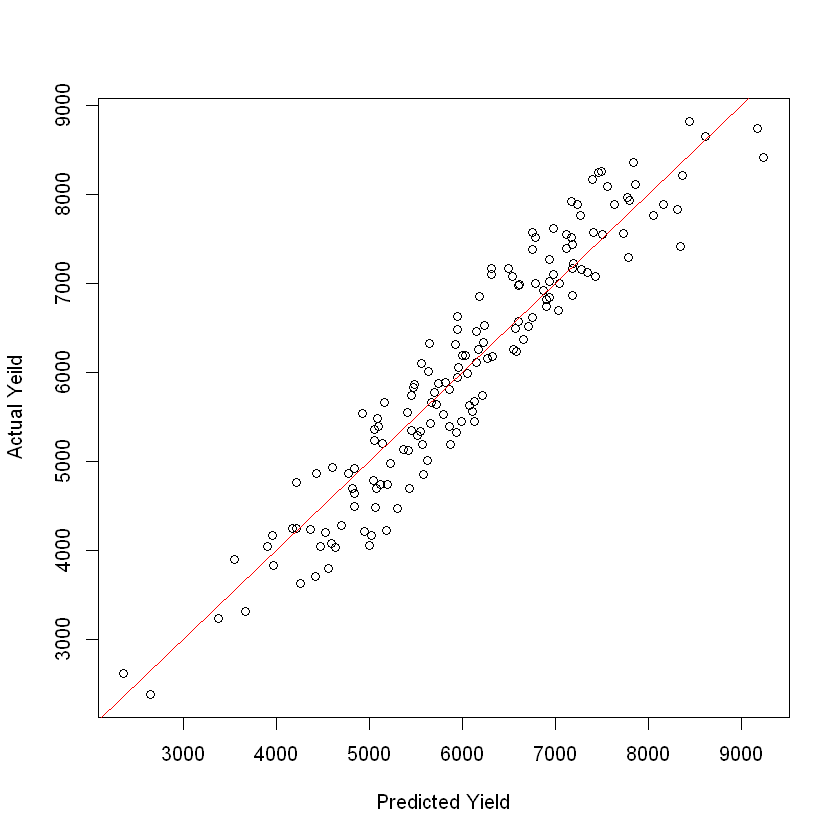

In [70]:
 plot(df_test_lmf$predicted_yield, df_test_lmf$yield, 
      xlab="Predicted Yield",ylab="Actual Yeild")
 abline(a=0,b=1,col = 'red')

In [105]:
vif(lmf)# checking VIF scores for multicollinearity.

clonesize             honeybee              bumbles 
        1.039942e+00         1.147397e+00         1.220476e+00 
             andrena                osmia     MaxOfUpperTRange 
        1.229854e+00         1.434691e+00         3.846115e+05 
    MaxOfLowerTRange     MinOfLowerTRange AverageOfLowerTRange 
        1.963740e+05         1.886248e+05         6.802361e+04 
         RainingDays   AverageRainingDays 
        6.051471e+01         6.096278e+01

### There are some serious concerns of multicollinearity.

In [51]:
# Backward Feature Selection
stepAIC(lm1, direction = "backward", trace = FALSE)$anova 
# backward elimination using AIC

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,609,121197025,7588.772
- AverageOfLowerTRange,0,7.003546e-07,609,121197025,7588.772
- MinOfLowerTRange,0,7.003546e-07,609,121197025,7588.772


In [52]:
# Lets run the model using Backward selection variables
lmb = lm( yield ~.-AverageOfLowerTRange-MinOfLowerTRange, data = df_train)
summary(lmb)


Call:
lm(formula = yield ~ . - AverageOfLowerTRange - MinOfLowerTRange, 
    data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2789.90  -283.22    37.94   293.25  1075.15 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           11667.884    428.234  27.247  < 2e-16 ***
clonesize               -97.027      2.596 -37.382  < 2e-16 ***
honeybee                113.930     17.567   6.485 1.83e-10 ***
bumbles                6260.478    292.684  21.390  < 2e-16 ***
andrena                 556.373    122.530   4.541 6.76e-06 ***
osmia                  2243.512    124.937  17.957  < 2e-16 ***
MaxOfUpperTRange     -19242.040   1176.412 -16.357  < 2e-16 ***
MinOfUpperTRange       2081.430    704.023   2.956  0.00323 ** 
AverageOfUpperTRange   1366.587    868.395   1.574  0.11608    
MaxOfLowerTRange      23273.065   1834.620  12.685  < 2e-16 ***
RainingDays              41.665     11.539   3.611  0.00033 ***
AverageRainingDays

In [58]:
# Predict lmb in test set
df_test_lmb <- df_test %>% 
  mutate(predicted_yield = predict(lmb, newdata = df_test))

In [59]:
# Calculate RMSE for model evaluation:
rmse(df_test_lmb, yield, predicted_yield) # root mean sum of squares error

.metric,.estimator,.estimate
rmse,standard,434.1796


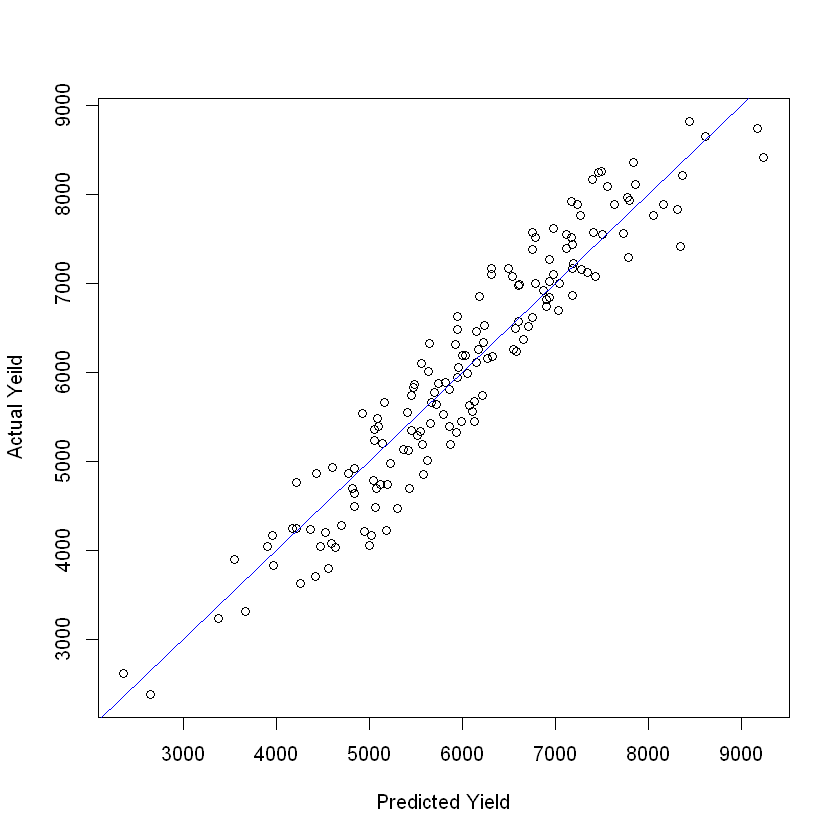

In [71]:
 plot(df_test_lmb$predicted_yield, df_test_lmb$yield,
      xlab="Predicted Yield",ylab="Actual Yeild")
 abline(a=0,b=1, col = 'blue')

In [104]:
vif(lmb) # Also, Computing VIF scores to check multicollinearity

clonesize             honeybee              bumbles 
        1.039942e+00         1.147397e+00         1.220476e+00 
             andrena                osmia     MaxOfUpperTRange 
        1.229854e+00         1.434691e+00         3.597147e+05 
    MinOfUpperTRange AverageOfUpperTRange     MaxOfLowerTRange 
        4.781634e+04         1.366052e+05         4.575207e+05 
         RainingDays   AverageRainingDays 
        6.051471e+01         6.096278e+01

### There are some serious concerns of multicollinearity.

In [64]:
# Step wise Backward Selection
stepAIC(lm1, direction = "both", trace = FALSE)$anova # stepwise using AIC
stepAIC(lm1, scope = list(upper = lm1, lower = ~1),direction = "both", 
        trace = FALSE, k= log(length(df$yield)))$anova #this uses BIC

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,609,121197025,7588.772
- AverageOfLowerTRange,0,1.490116e-08,609,121197025,7588.772
- MinOfLowerTRange,0,7.003546e-07,609,121197025,7588.772


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,609,121197025,7644.637
- AverageOfLowerTRange,0,0.0,609,121197025,7644.637
- MinOfLowerTRange,0,0.0,609,121197025,7644.637
- AverageOfUpperTRange,1,492849.8,610,121689874,7640.502


In [65]:
# lets run linear models using features from step wise feature selection using BIC
lmsb = lm(yield ~.-AverageOfLowerTRange-MinOfLowerTRange-AverageOfUpperTRange, data = df_train)
summary(lmsb)


Call:
lm(formula = yield ~ . - AverageOfLowerTRange - MinOfLowerTRange - 
    AverageOfUpperTRange, data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2756.11  -283.38    39.68   302.93  1048.48 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         12177.910    280.243  43.455  < 2e-16 ***
clonesize             -97.113      2.598 -37.378  < 2e-16 ***
honeybee              116.028     17.538   6.616 8.09e-11 ***
bumbles              6245.873    292.891  21.325  < 2e-16 ***
andrena               555.486    122.677   4.528 7.16e-06 ***
osmia                2234.142    124.946  17.881  < 2e-16 ***
MaxOfUpperTRange   -20357.137    940.205 -21.652  < 2e-16 ***
MinOfUpperTRange     3164.884    147.299  21.486  < 2e-16 ***
MaxOfLowerTRange    25487.188   1178.834  21.621  < 2e-16 ***
RainingDays            42.442     11.543   3.677 0.000257 ***
AverageRainingDays  -7643.597    819.451  -9.328  < 2e-16 ***
---
Signif. codes: 

In [72]:
# Predict lmsb in test set
df_test_lmsb <- df_test %>% 
  mutate(predicted_yield = predict(lmsb, newdata = df_test))

In [126]:
# Calculate RMSE for model evaluation:
rmse(df_test_lmsb, yield, predicted_yield) # root mean sum of squares error
rsq(df_test_lmsb, yield, predicted_yield)# R-square

.metric,.estimator,.estimate
rmse,standard,437.9681


.metric,.estimator,.estimate
rsq,standard,0.9024708


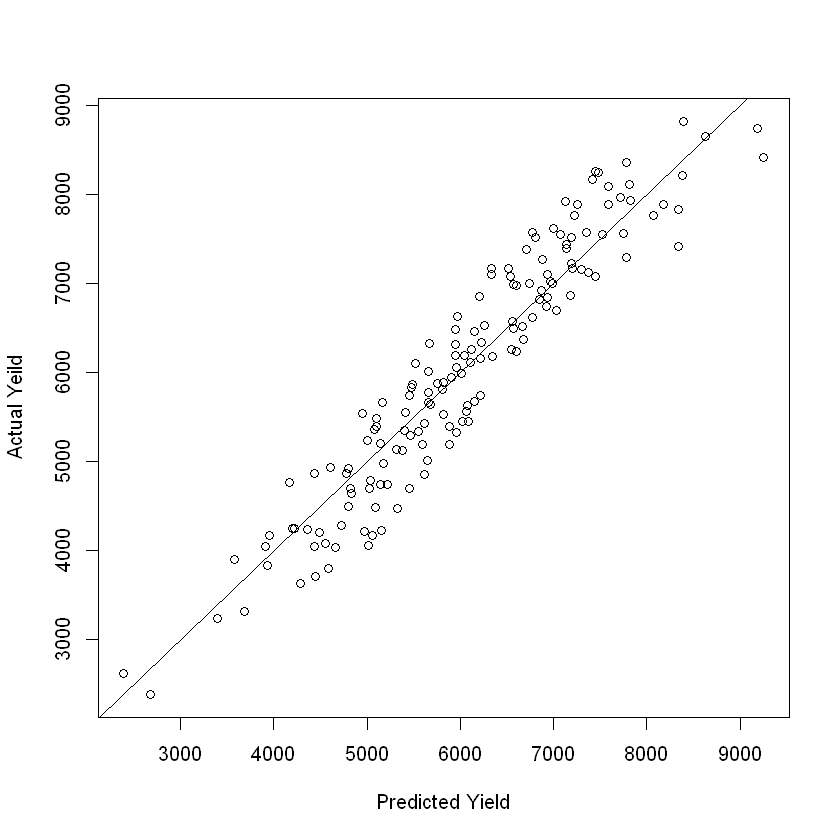

In [74]:
 plot(df_test_lmsb$predicted_yield, df_test_lmsb$yield,
      xlab="Predicted Yield",ylab="Actual Yeild")
 abline(a=0,b=1)

In [103]:
vif(lmsb) # Also, Computing VIF scores to check multicollinearity

clonesize           honeybee            bumbles            andrena 
      1.039483e+00       1.140794e+00       1.219249e+00       1.229828e+00 
             osmia   MaxOfUpperTRange   MinOfUpperTRange   MaxOfLowerTRange 
      1.431433e+00       2.292104e+05       2.088095e+03       1.884404e+05 
       RainingDays AverageRainingDays 
      6.040400e+01       6.084601e+01

### There are still some serious concerns of multicollinearity.

In [77]:
#install.packages('leaps')
library(leaps)

In [78]:
# Can use regsubsets() for best subset selection
fit.best=regsubsets(yield~clonesize+honeybee+bumbles+andrena+osmia+AverageOfUpperTRange+AverageOfLowerTRange+
                    RainingDays+AverageRainingDays, 
                    data=df, nbest=10,force.in=c("clonesize","RainingDays"))

In [79]:
# models of any size 
(best = summary(fit.best))
cbind(best$which, best$cp)
cbind(best$which, best$bic)

Subset selection object
Call: regsubsets.formula(yield ~ clonesize + honeybee + bumbles + andrena + 
    osmia + AverageOfUpperTRange + AverageOfLowerTRange + RainingDays + 
    AverageRainingDays, data = df, nbest = 10, force.in = c("clonesize", 
    "RainingDays"))
9 Variables  (and intercept)
                     Forced in Forced out
clonesize                 TRUE      FALSE
RainingDays              FALSE      FALSE
honeybee                 FALSE      FALSE
bumbles                  FALSE      FALSE
andrena                  FALSE      FALSE
osmia                    FALSE      FALSE
AverageOfUpperTRange     FALSE      FALSE
AverageOfLowerTRange      TRUE      FALSE
AverageRainingDays       FALSE      FALSE
10 subsets of each size up to 8
Selection Algorithm: exhaustive
          clonesize RainingDays honeybee bumbles andrena osmia
3  ( 1 )  "*"       "*"         " "      " "     " "     "*"  
3  ( 2 )  "*"       "*"         " "      "*"     " "     " "  
3  ( 3 )  "*"       "*"       

,(Intercept),clonesize,RainingDays,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,
3,1,1,1,0,0,0,1,0,0,0,466.21285
3,1,1,1,0,1,0,0,0,0,0,505.53790
3,1,1,1,0,0,0,0,1,0,0,881.04879
3,1,1,1,0,0,0,0,0,1,0,881.86963
3,1,1,1,0,0,1,0,0,0,0,894.12947
3,1,1,1,0,0,0,0,0,0,1,980.35709
3,1,1,1,1,0,0,0,0,0,0,991.35738
4,1,1,1,0,1,0,1,0,0,0,210.74412
4,1,1,1,0,0,0,1,0,1,0,379.05173
4,1,1,1,0,0,0,1,1,0,0,379.28471


,(Intercept),clonesize,RainingDays,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,
3,1,1,1,0,0,0,1,0,0,0,-907.2141
3,1,1,1,0,1,0,0,0,0,0,-882.8626
3,1,1,1,0,0,0,0,1,0,0,-682.2247
3,1,1,1,0,0,0,0,0,1,0,-681.8383
3,1,1,1,0,0,1,0,0,0,0,-676.0894
3,1,1,1,0,0,0,0,0,0,1,-636.8142
3,1,1,1,1,0,0,0,0,0,0,-631.9435
4,1,1,1,0,1,0,1,0,0,0,-1082.1828
4,1,1,1,0,0,0,1,0,1,0,-958.7719
4,1,1,1,0,0,0,1,1,0,0,-958.6140


In [80]:
# Run Linear Model using varaibles selected by best subset selection
lmss = lm(yield~clonesize+RainingDays+honeybee+bumbles+andrena+osmia+
          AverageOfLowerTRange+AverageRainingDays, data = df_train)

In [81]:
summary(lmss)


Call:
lm(formula = yield ~ clonesize + RainingDays + honeybee + bumbles + 
    andrena + osmia + AverageOfLowerTRange + AverageRainingDays, 
    data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2675.75  -379.37    53.14   429.86  1382.53 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           8030.209    272.023  29.520  < 2e-16 ***
clonesize              -95.875      3.452 -27.776  < 2e-16 ***
RainingDays             43.415     15.316   2.835  0.00474 ** 
honeybee               119.742     23.272   5.145 3.60e-07 ***
bumbles               6146.998    387.620  15.858  < 2e-16 ***
andrena                480.183    162.884   2.948  0.00332 ** 
osmia                 2186.020    164.556  13.284  < 2e-16 ***
AverageOfLowerTRange   -37.010      4.445  -8.327 5.44e-16 ***
AverageRainingDays   -7624.628   1087.271  -7.013 6.21e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard er

In [205]:
# Predict lmsb in test set
df_test_lmss <- df_test %>% 
  mutate(predicted_yield = predict(lmss, newdata = df_test))

# Calculate RMSE for model evaluation:
rmse(df_test_lmss, yield, predicted_yield) # root mean sum of squares error
rsq(df_test_lmss, yield, predicted_yield)# r-square

.metric,.estimator,.estimate
rmse,standard,584.706


.metric,.estimator,.estimate
rsq,standard,0.8354682


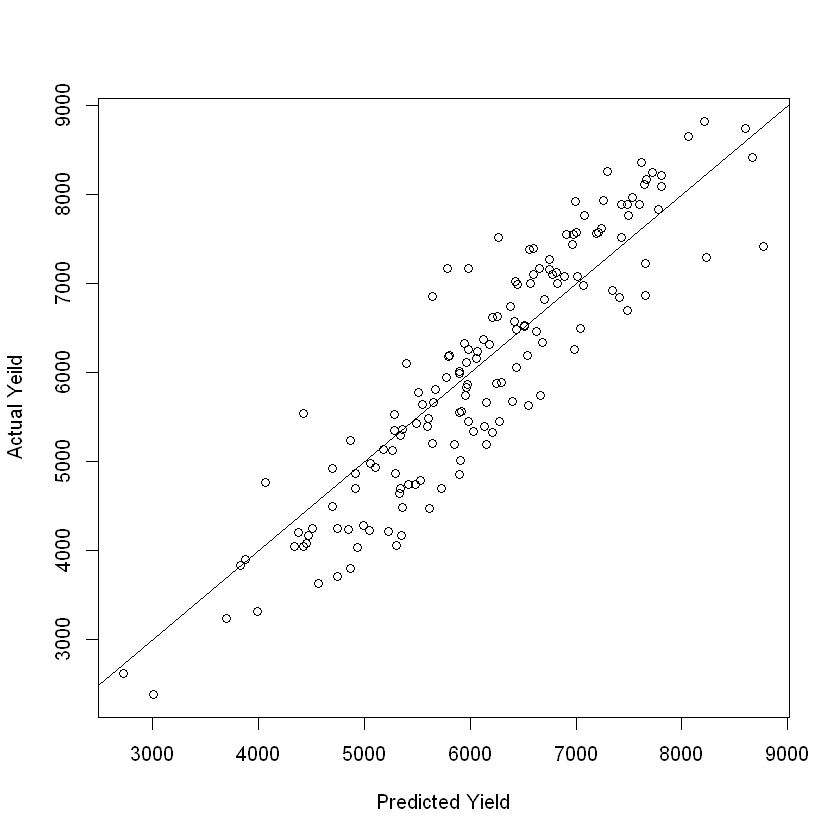

In [84]:
 plot(df_test_lmss$predicted_yield, df_test_lmss$yield,
      xlab="Predicted Yield",ylab="Actual Yeild")
 abline(a=0,b=1)

In [102]:
vif(lmss) # Also, Computing VIF scores to check multicollinearity

clonesize          RainingDays             honeybee 
            1.038982            60.224449             1.137543 
             bumbles              andrena                osmia 
            1.209282             1.227742             1.406013 
AverageOfLowerTRange   AverageRainingDays 
            1.006673            60.659019

### It shows that Raining Days and AverageRainning days have concerns of multicollinearity

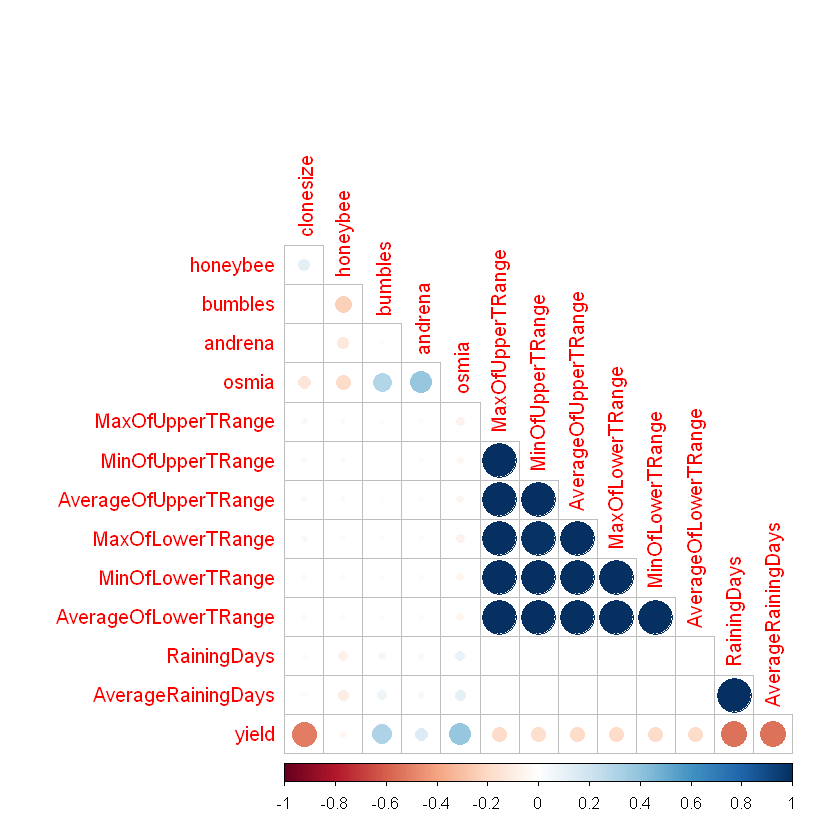

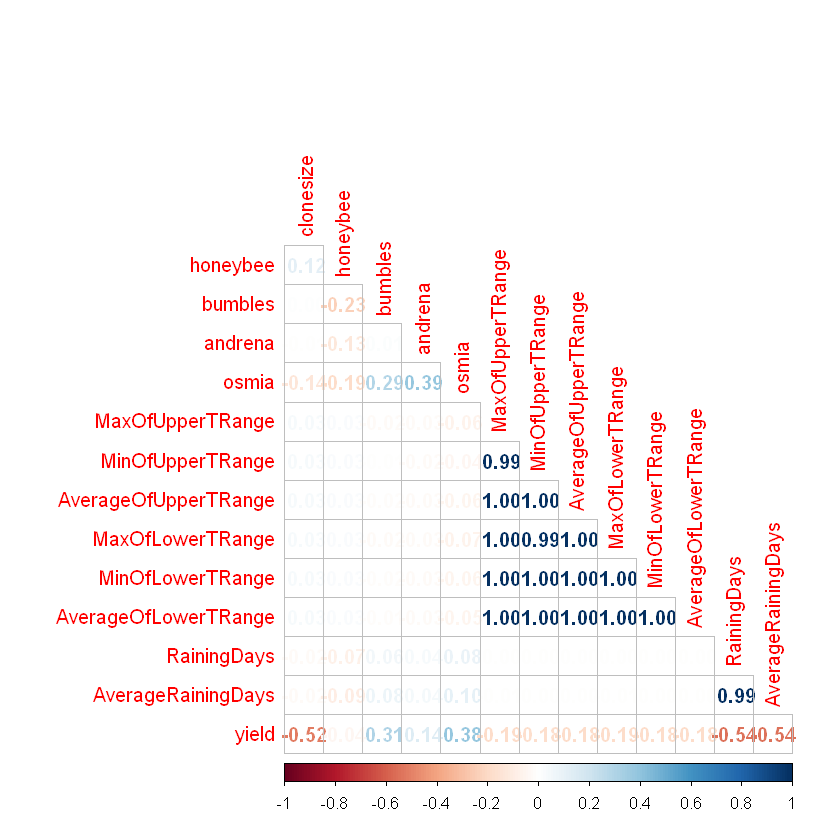

In [85]:
# Handle Mutlicollinearity using correlation heat map
# library(corrplot)
cor_matrix = cor(df)

corrplot(cor_matrix, type = "lower",diag = F)

corrplot(cor_matrix, type = "lower",diag = F,method = 'number')

In [86]:

# remove MinofUpperTRange, MAxofUpperTrange,MinOfLowerTRAnge, MaxofLowerTRange---these are highly correlated columns
df1 <- subset(df, select = -c(MaxOfUpperTRange,MinOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange))

In [87]:
str(df1)

'data.frame':	777 obs. of  10 variables:
 $ clonesize           : num  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ honeybee            : num  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 ...
 $ bumbles             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ andrena             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ osmia               : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ AverageOfUpperTRange: num  71.9 71.9 79 79 71.9 71.9 79 79 64.7 64.7 ...
 $ AverageOfLowerTRange: num  50.8 50.8 55.9 55.9 50.8 50.8 55.9 55.9 45.8 45.8 ...
 $ RainingDays         : num  16 1 16 1 24 34 24 34 16 1 ...
 $ AverageRainingDays  : num  0.26 0.1 0.26 0.1 0.39 0.56 0.39 0.56 0.26 0.1 ...
 $ yield               : num  3813 4948 3867 4304 3436 ...


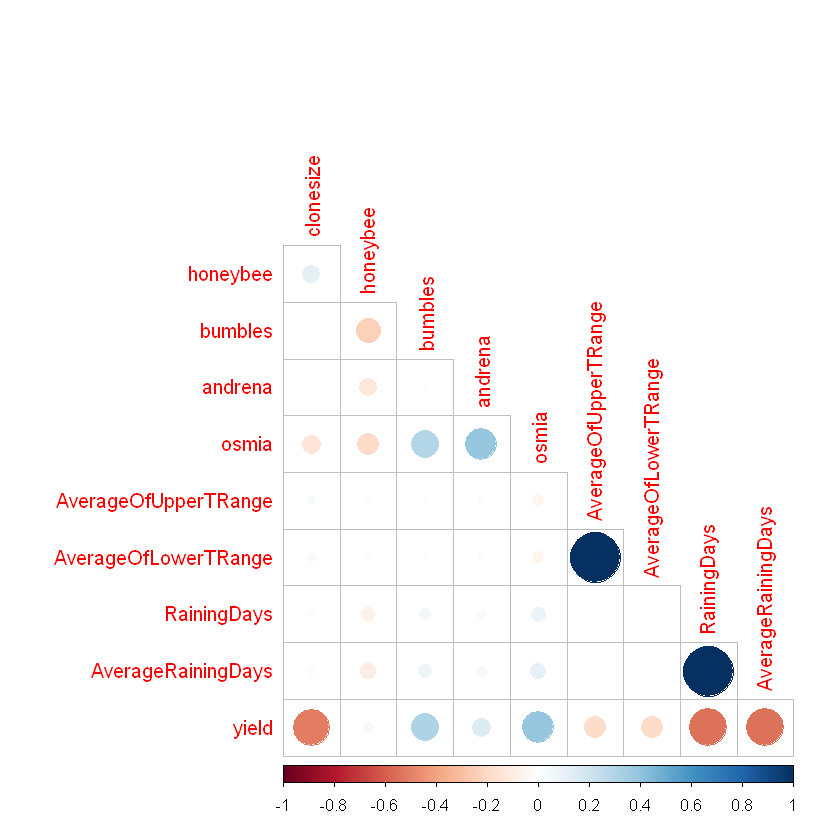

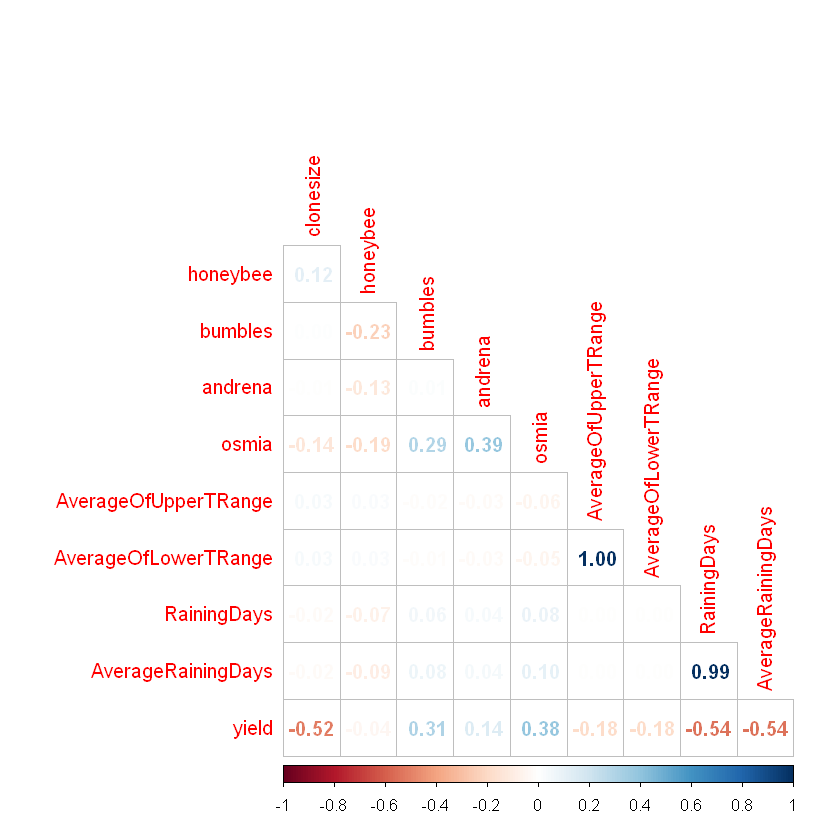

In [89]:
# Lets check if we still have multicollinearity among explanatroy variables or not using correlation heat map
cor_matrix1 = cor(df1)

corrplot(cor_matrix1, type = "lower",diag = F)

corrplot(cor_matrix1, type = "lower",diag = F, method = 'number')

In [92]:
# AverageOfLowerTRAnge highly correlated to Averageof UpperTRange---- 
# and RAinning Days is highly correlated to avgrainning days
# Remove one var from each
df1 <- subset(df1, select = -c(RainingDays,AverageOfLowerTRange))

In [93]:
cor_matrix2  <- cor(df1)

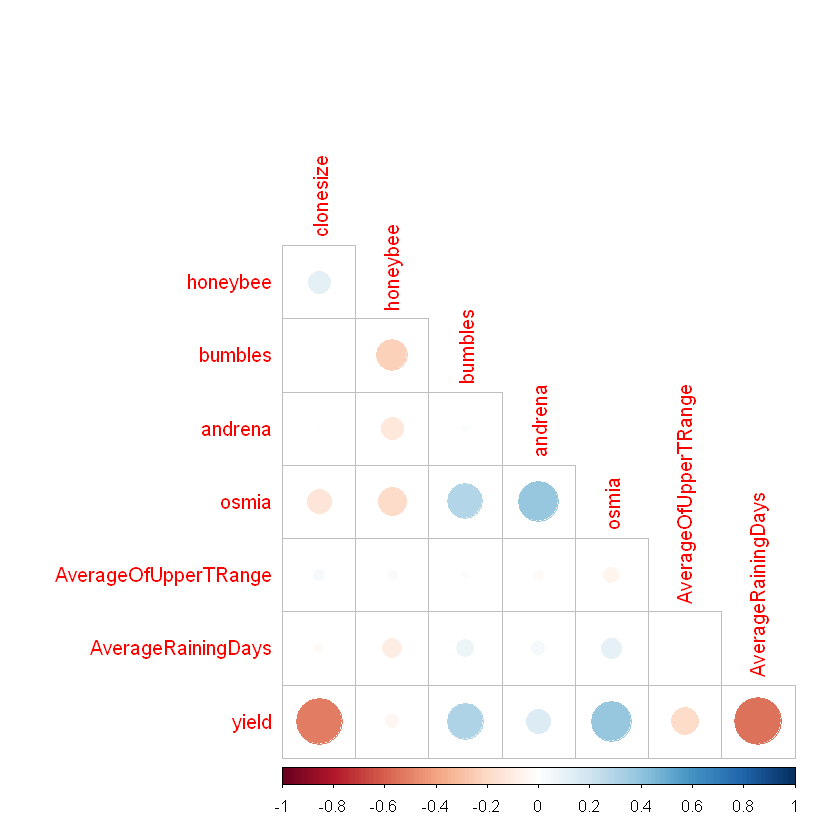

In [94]:
corrplot(cor_matrix2, type = "lower",diag = F,method = 'number')

### Now, we do not have any multicollinearity among explanatory varaibales.

In [95]:
str(df1)

'data.frame':	777 obs. of  8 variables:
 $ clonesize           : num  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ honeybee            : num  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 ...
 $ bumbles             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ andrena             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ osmia               : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ AverageOfUpperTRange: num  71.9 71.9 79 79 71.9 71.9 79 79 64.7 64.7 ...
 $ AverageRainingDays  : num  0.26 0.1 0.26 0.1 0.39 0.56 0.39 0.56 0.26 0.1 ...
 $ yield               : num  3813 4948 3867 4304 3436 ...


In [97]:

# Train-Test Split
set.seed(602)

df1_split <- initial_split(df1, prop = 0.8)

df1_train <- training(df1_split)
df1_test <- testing(df1_split)


In [98]:
# Run Regression Model 

ln_model1 = lm(yield ~ . ,data = df1_train) # reduced model after handling multicollinearity

summary(ln_model1)


Call:
lm(formula = yield ~ ., data = df1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2552.9  -386.1    76.7   454.8  1336.6 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           7878.626    268.492  29.344  < 2e-16 ***
clonesize              -95.808      3.472 -27.594  < 2e-16 ***
honeybee               127.254     23.258   5.471 6.51e-08 ***
bumbles               6061.543    388.859  15.588  < 2e-16 ***
andrena                479.120    163.846   2.924  0.00358 ** 
osmia                 2142.414    164.892  12.993  < 2e-16 ***
AverageOfUpperTRange   -25.977      3.155  -8.233 1.10e-15 ***
AverageRainingDays   -4568.842    141.816 -32.217  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 597.1 on 613 degrees of freedom
Multiple R-squared:  0.8064,	Adjusted R-squared:  0.8042 
F-statistic: 364.8 on 7 and 613 DF,  p-value: < 2.2e-16


In [206]:
# Predict  trained model in test set
df_test_lm1 <- df_test %>% 
  mutate(predicted_yield = predict(ln_model1, newdata = df_test))

# Calculate RMSE for model evaluation:
rmse(df_test_lm1, yield, predicted_yield) # root mean sum of squares error
rsq(df_test_lm1, yield, predicted_yield)# r-square

.metric,.estimator,.estimate
rmse,standard,593.0944


.metric,.estimator,.estimate
rsq,standard,0.8307101


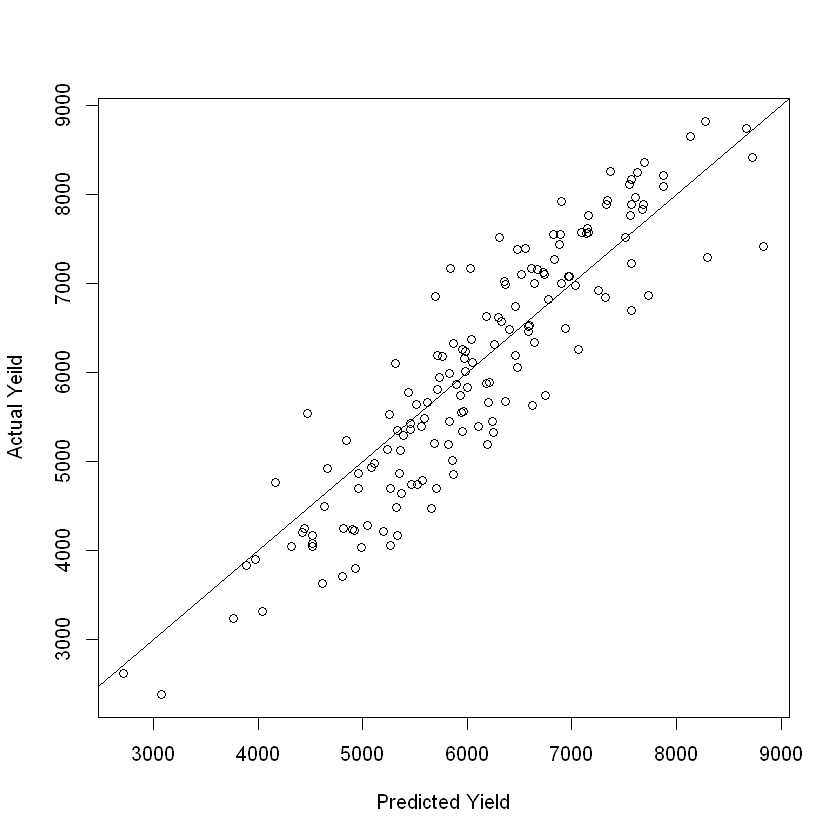

In [128]:
# plot of actaul vs predicted
plot(df_test_lm1$predicted_yield, df_test_lm1$yield,
      xlab="Predicted Yield",ylab="Actual Yeild")
 abline(a=0,b=1)

In [ ]:
# install.packages('car')
library(car)


In [101]:
vif(ln_model1) # Also, Computing VIF scores to check multicollinearity

clonesize             honeybee              bumbles 
            1.038912             1.122783             1.202709 
             andrena                osmia AverageOfUpperTRange 
            1.227683             1.395150             1.006756 
  AverageRainingDays 
            1.019845

### Since all the VIF scores are less than 2.5, there is no concern of multicollinearity.

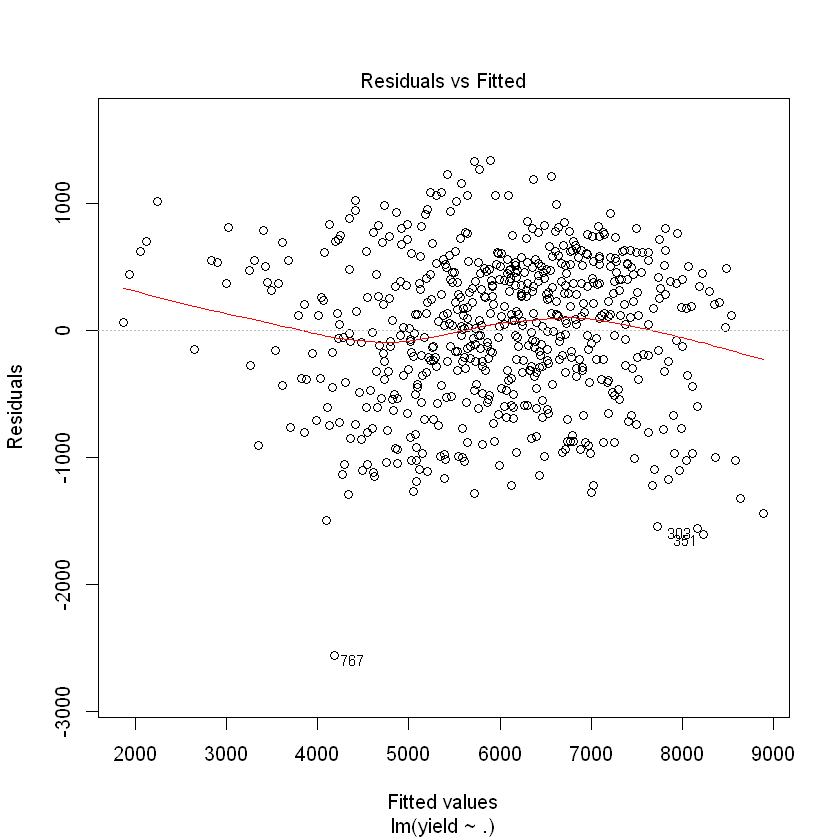

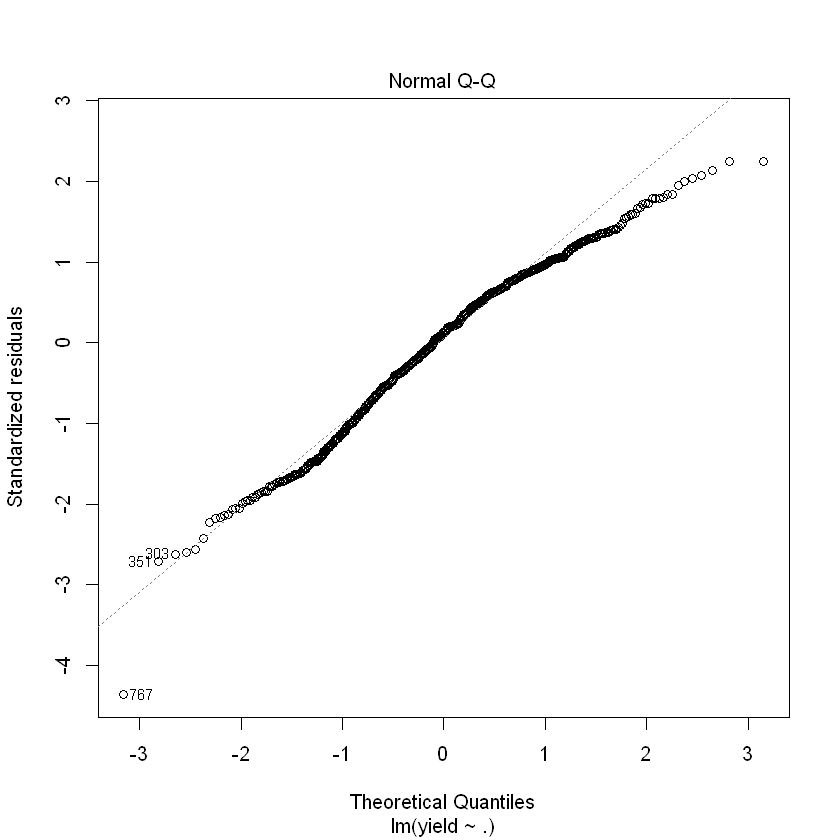

In [156]:
# Residual vs fitted values 
plot(ln_model1,1:2)

In [157]:
### It's time for handling influential points--such as outliers if it esxists.

# Leverage Values
lm1hat = hatvalues(ln_model1) # hatvalues
id.lm1hat = which(lm1hat > 2*length(ln_model1$coefficients)/length(df_train$yield))
lm1hat[id.lm1hat] #identifies cases 17, 31 and 32

769        773        763        772        767        768        762 
0.04795361 0.02741197 0.44419205 0.02983748 0.03876360 0.08067245 0.07510369 
       770        774        761        766        764 
0.06622940 0.03653480 0.02956859 0.44522640 0.06370259

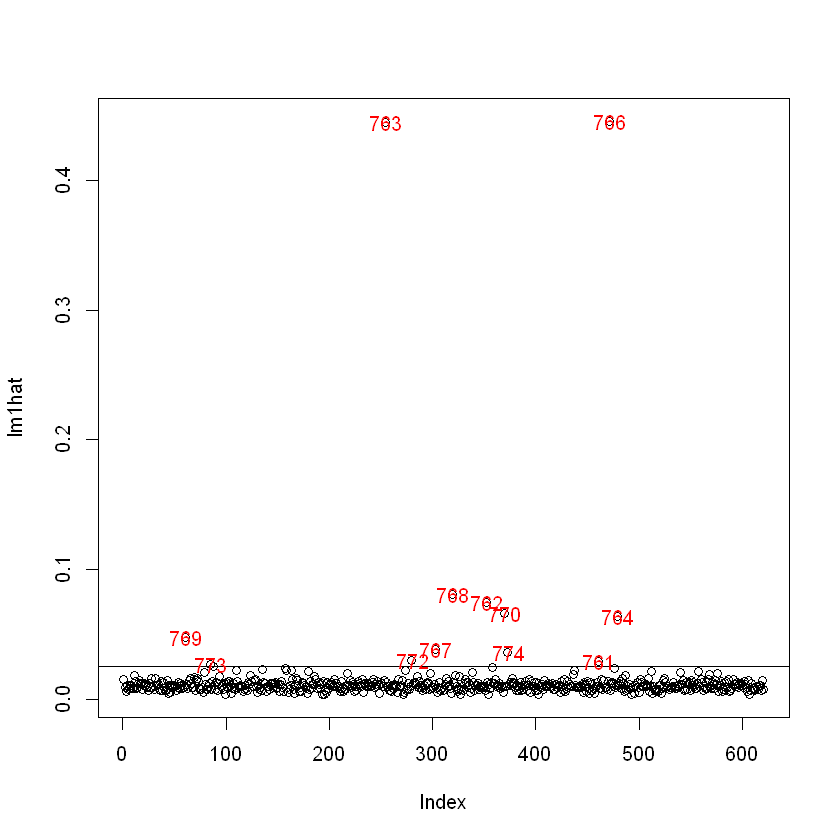

In [197]:
#plot(lm1hat, type = 'h')
plot(lm1hat)
h1 = 2*length(ln_model1$coefficients)/length(df_train$yield)# threshold
abline(h=h1)
text(x = 1:length(lm1hat)+1, y = lm1hat, 
     labels = ifelse(lm1hat>h1, names(lm1hat),''),col = 'red')# add labels

351       431       769       321       411       401        58       303 
-2.708051 -2.222950 -2.566591  2.068217 -2.165365  2.042476 -2.133949 -2.618022 
      447       767       209       597       693       741       139       129 
-2.421807 -4.361209  2.140851 -2.141230 -2.062231 -2.594710 -2.171652  2.243810 
      433       122       305       442 
 2.005265 -2.051320  2.249295 -2.057041

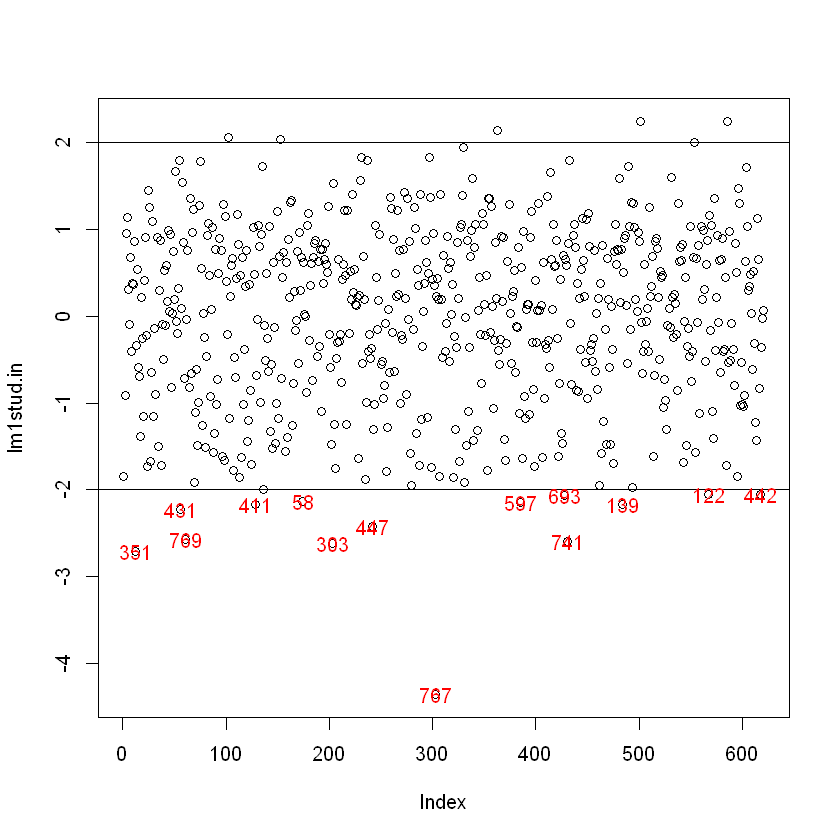

In [195]:
library(MASS)
lm1stud.in = stdres(ln_model1) # internally studentized
id.lm1stud1 = which(abs(lm1stud.in)>2)
lm1stud.in[id.lm1stud1] # identifies observations 26 and 32

plot(lm1stud.in) # same plot as in Display 11.12
abline(h=c(-2,2))
text(x = 1:length(lm1stud.in)+1, y = lm1stud.in, 
     labels = ifelse(-2>lm1stud.in, names(lm1stud.in),''),col = 'red')# add labels

351       431       769       321       411       737       401        58 
-2.722173 -2.230143 -2.578388  2.073778 -2.171920 -2.001393  2.047789 -2.140171 
      303       447       767       209       597       693       741       139 
-2.630634 -2.431491 -4.426870  2.147146 -2.147529 -2.067734 -2.606948 -2.178275 
      129       433       122       305       442 
 2.251243  2.010233 -2.056717  2.256792 -2.062493

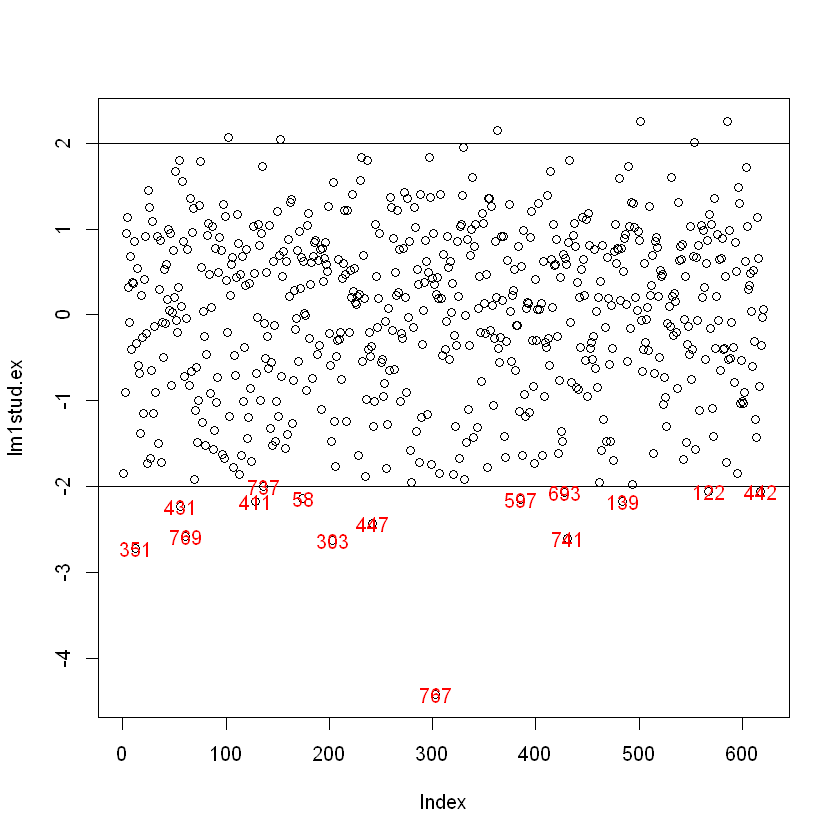

In [194]:
lm1stud.ex = studres(ln_model1) # externally studentized residuals
id.lm1stud2 = which(abs(lm1stud.ex)>2)
lm1stud.ex[id.lm1stud2] # also identifies observation 26 and 32

plot(lm1stud.ex) 
abline(h=c(-2,2)) # note that this plot is slightly different from that in 
#Display 11.12
text(x = 1:length(lm1stud.ex)+1, y = lm1stud.ex, 
     labels = ifelse(-2>lm1stud.ex, names(lm1stud.ex),''),col = 'red')# add labels

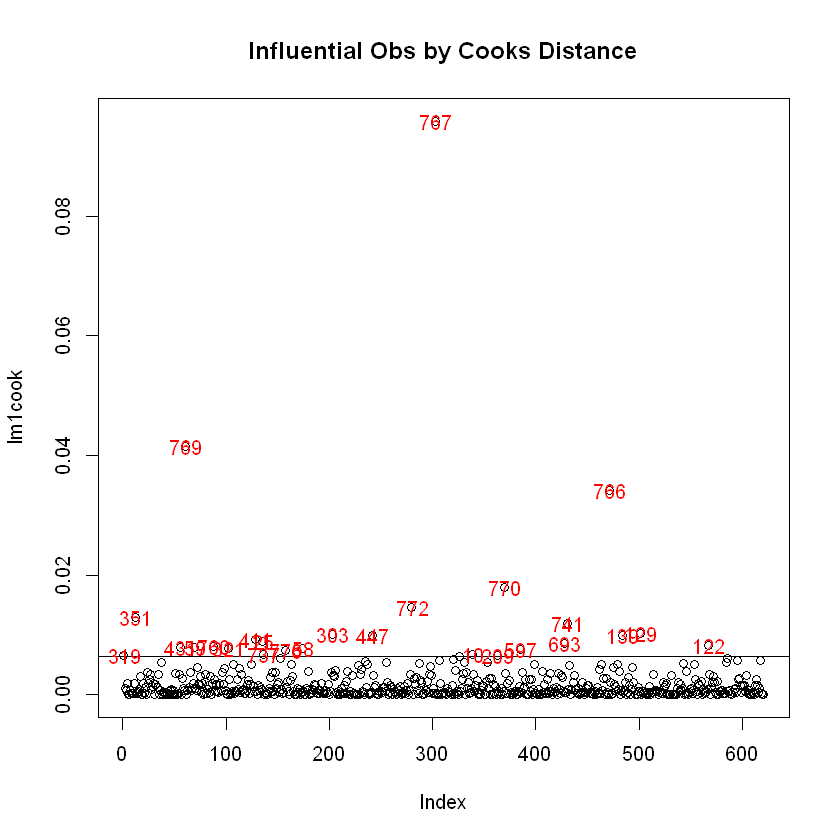

In [177]:
lm1cook = cooks.distance(ln_model1) # Cook's distances for all 32 points

plot(lm1cook,main ="Influential Obs by Cooks Distance") # identifies observations 31 and 32
abline(h = 4/nrow(df1_train) )# add cutoff line of 4/n
text(x = 1:length(lm1cook)+1, y = lm1cook, 
     labels = ifelse(lm1cook > 4/nrow(df1_train), names(lm1cook),''),col = 'red') # add labels

## Decision Tree Regressor

In [167]:
# Run Decision Tree Regression Model
#install.packages("rpart")
library(rpart)

In [168]:
#Decision Tree
dtr <- rpart(yield~.,df1_train, method = "anova")
summary(dtr)

Call:
rpart(formula = yield ~ ., data = df1_train, method = "anova")
  n= 621 

           CP nsplit rel error    xerror       xstd
1  0.25971622      0 1.0000000 1.0012701 0.05247816
2  0.14954865      1 0.7402838 0.7858390 0.04832561
3  0.10380833      2 0.5907351 0.6106696 0.03800180
4  0.07802269      3 0.4869268 0.5341277 0.03404597
5  0.06326982      4 0.4089041 0.4840277 0.03256576
6  0.03143505      5 0.3456343 0.3802377 0.02305826
7  0.02424337      6 0.3141992 0.3594060 0.02225485
8  0.02059149      7 0.2899559 0.3333513 0.02110554
9  0.01556659      8 0.2693644 0.3105968 0.02050900
10 0.01499693      9 0.2537978 0.3017471 0.02014092
11 0.01446469     10 0.2388009 0.3007135 0.02012365
12 0.01124377     11 0.2243362 0.2738692 0.01912075
13 0.01072685     12 0.2130924 0.2581858 0.01860239
14 0.01000000     13 0.2023656 0.2451916 0.01817116

Variable importance
  AverageRainingDays            clonesize             honeybee 
                  25                   22              

In [169]:
# Predict  trained modelin test set
df_test_dtr <- df_test %>% 
  mutate(predicted_yield = predict(dtr, newdata = df_test))

# Calculate RMSE for model evaluation:
rmse(df_test_dtr, yield, predicted_yield) # root mean sum of squares error
rsq(df_test_dtr, yield, predicted_yield)

.metric,.estimator,.estimate
rmse,standard,568.3208


.metric,.estimator,.estimate
rsq,standard,0.8329207


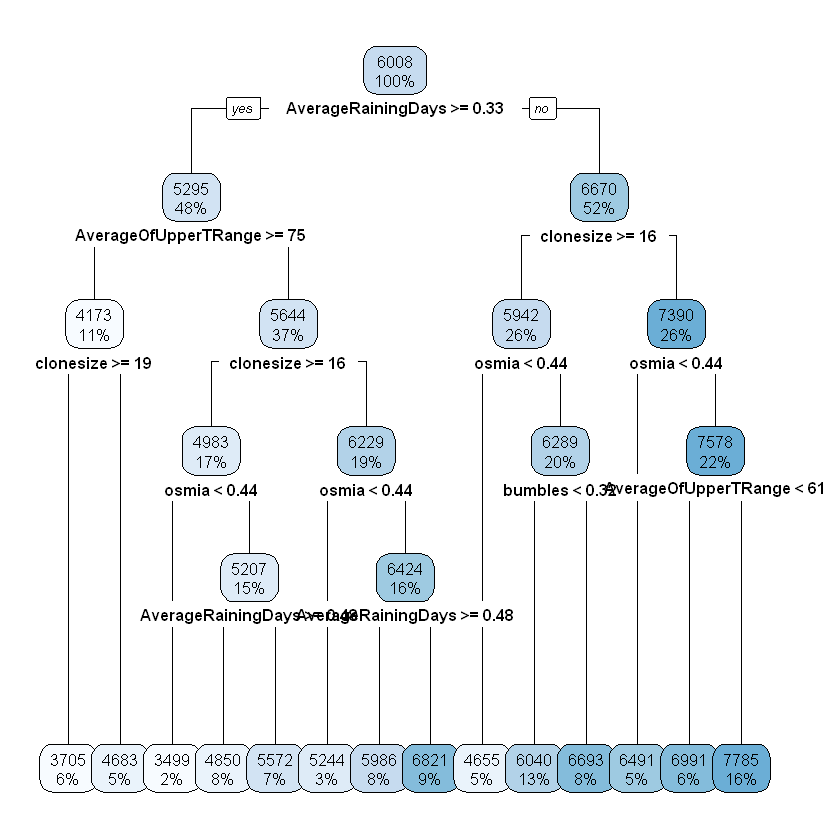

In [170]:
#install.packages('rpart.plot')
library(rpart.plot)
rpart.plot(dtr, cex=0.8)

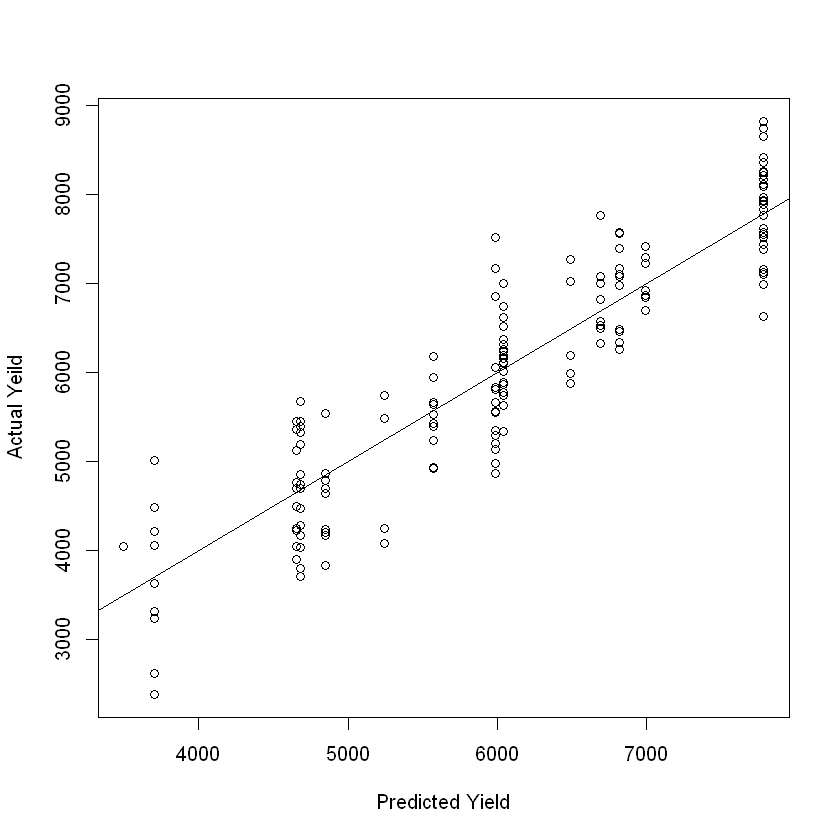

In [171]:
# plot of actaul vs predicted
plot(df_test_dtr$predicted_yield, df_test_dtr$yield,
      xlab="Predicted Yield",ylab="Actual Yeild")
 abline(a=0,b=1)

### Random Forest Regressor

In [172]:
# Random Forest
#install.packages('randomForest')
library(randomForest)

In [173]:
rfm<- randomForest(yield~., df1_train, ntree = 1000, importance=TRUE)
summary(rfm)

                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted        621   -none- numeric  
mse             1000   -none- numeric  
rsq             1000   -none- numeric  
oob.times        621   -none- numeric  
importance        14   -none- numeric  
importanceSD       7   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y                621   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [207]:
# Predict  trained modelin test set
df_test_rfm <- df1_test %>% 
  mutate(predicted_yield = predict(rfm, newdata = df1_test))

# Calculate RMSE for model evaluation:
rmse(df_test_rfm, yield, predicted_yield) # root mean sum of squares error
rsq(df_test_rfm, yield, predicted_yield) # R-square

.metric,.estimator,.estimate
rmse,standard,451.6362


.metric,.estimator,.estimate
rsq,standard,0.928049


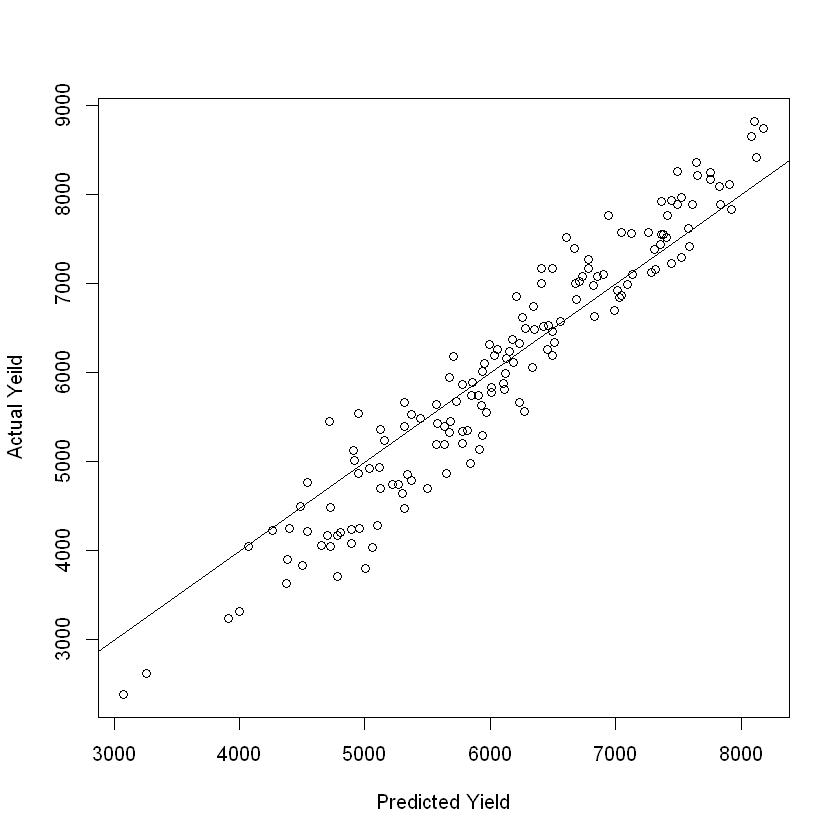

In [132]:
# plot of actaul vs predicted
plot(df_test_rfm$predicted_yield, df_test_rfm$yield,
      xlab="Predicted Yield",ylab="Actual Yeild")
 abline(a=0,b=1)

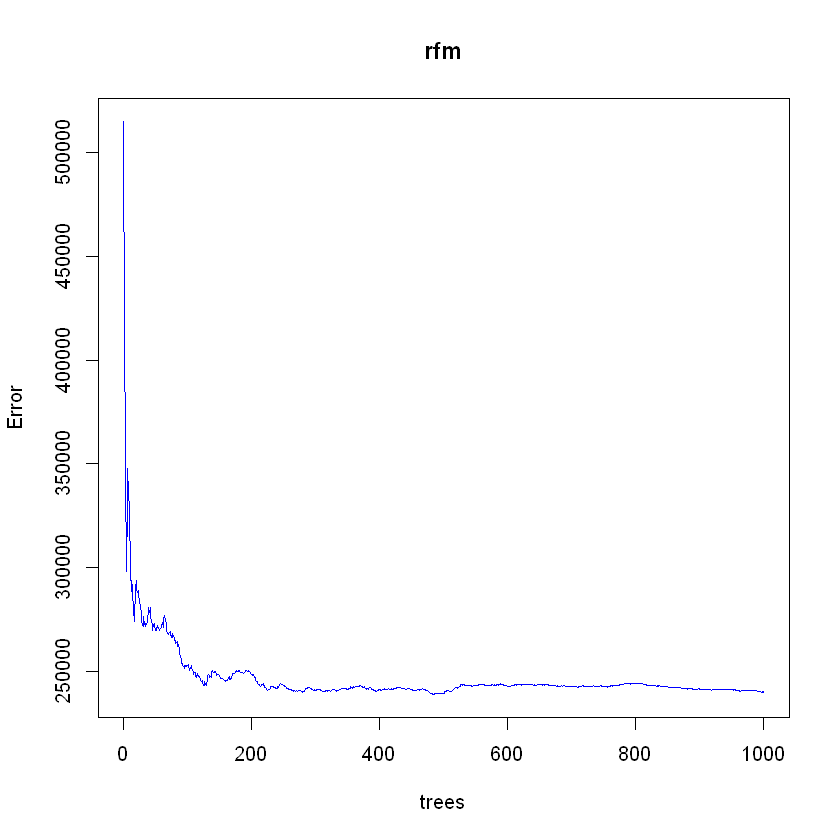

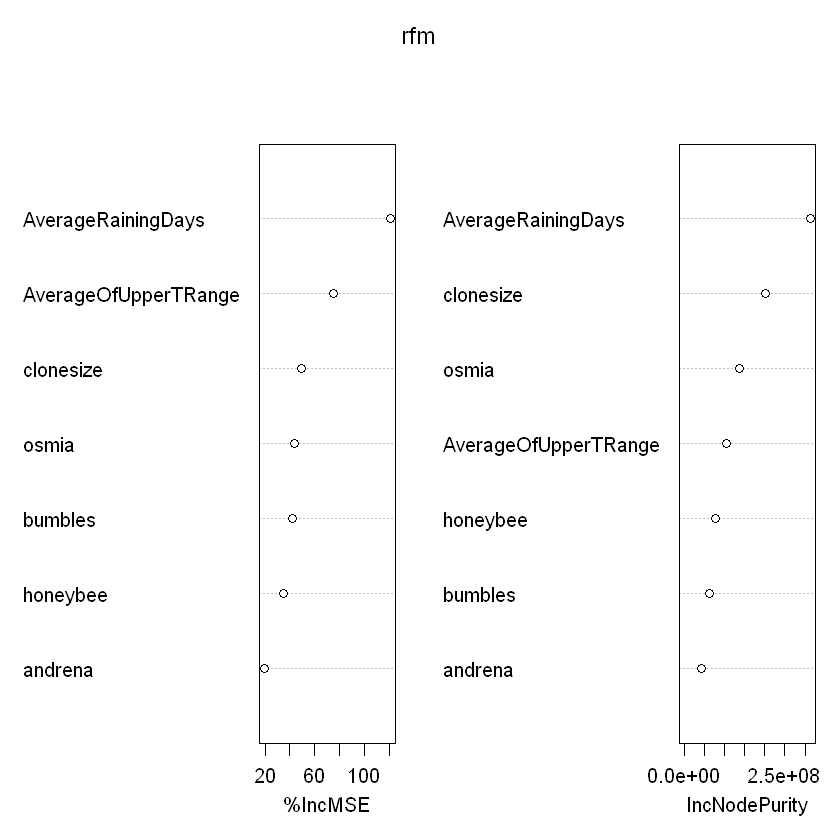

In [140]:
plot(rfm, col = 'blue')
varImpPlot(rfm)

##  GRADIENT BOOST MODEL

In [208]:
str(df1)

'data.frame':	777 obs. of  8 variables:
 $ clonesize           : num  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ honeybee            : num  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 ...
 $ bumbles             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ andrena             : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ osmia               : num  0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...
 $ AverageOfUpperTRange: num  71.9 71.9 79 79 71.9 71.9 79 79 64.7 64.7 ...
 $ AverageRainingDays  : num  0.26 0.1 0.26 0.1 0.39 0.56 0.39 0.56 0.26 0.1 ...
 $ yield               : num  3813 4948 3867 4304 3436 ...


In [142]:
#install.packages("gbm")
library(gbm)

,var,rel.inf
AverageRainingDays,AverageRainingDays,31.956652
clonesize,clonesize,23.827790
osmia,osmia,19.513572
AverageOfUpperTRange,AverageOfUpperTRange,12.354504
bumbles,bumbles,8.849192
andrena,andrena,2.172001
honeybee,honeybee,1.326291


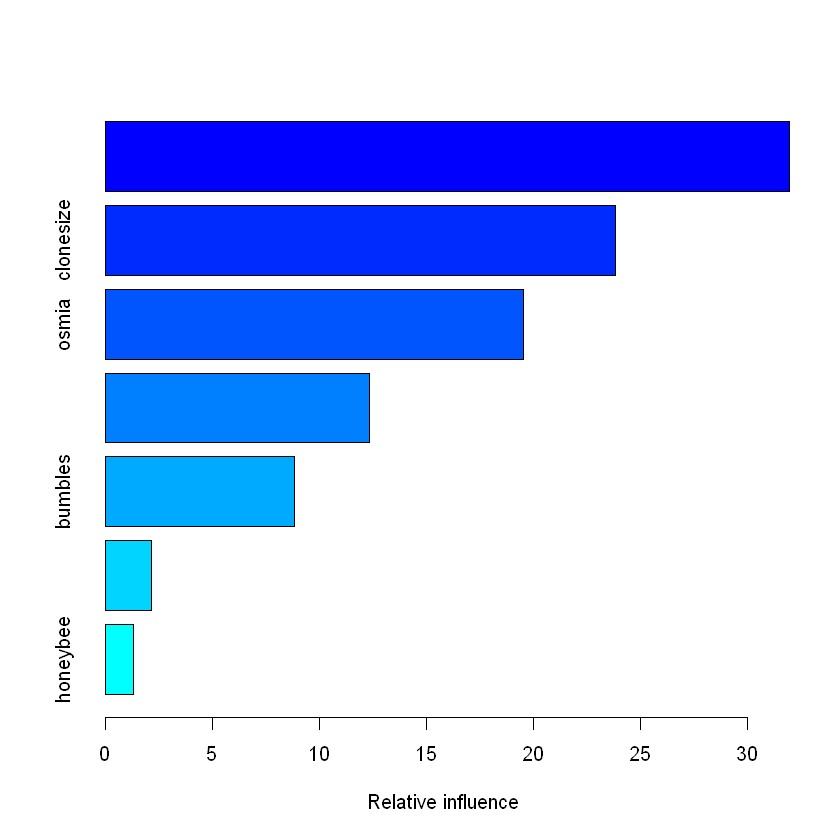

In [143]:
# For regression gradient boosting, the target variable should be numeric and the distribution be "gaussian".
Gbm <- gbm(yield ~ ., data = df1_train, distribution = "gaussian",  n.trees = 1000)

summary(Gbm)


In [144]:
# Predict  trained modelin test set
df_test_gbm <- df_test %>% 
  mutate(predicted_yield = predict(Gbm, newdata = df_test))

# Calculate RMSE for model evaluation:
rmse(df_test_gbm, yield, predicted_yield) # root mean sum of squares error
rsq(df_test_gbm, yield, predicted_yield) # R-square

Using 1000 trees...



.metric,.estimator,.estimate
rmse,standard,408.8846


.metric,.estimator,.estimate
rsq,standard,0.9145159


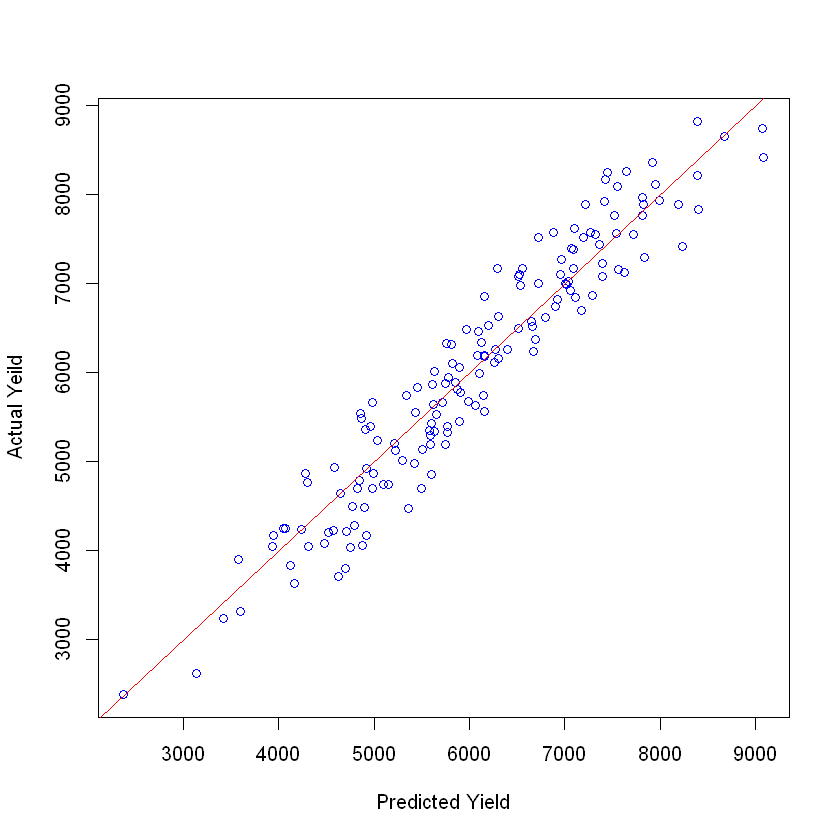

In [155]:
# plot of actaul vs predicted
plot(df_test_gbm$predicted_yield, df_test_gbm$yield,
      xlab="Predicted Yield",ylab="Actual Yeild",col='blue')
 abline(a=0,b=1,col='red')

### Gradiant Boosting is the preferred model---with lowest rmse , r-square of 0.9145 and no issue of multicollinearity.

In [ ]:
# Check the REsiduals and Normal-QQ plot
par(mfrow=c(2,2))
plot(ln_model1)

In [ ]:
# EDA and Visualizations
# Box plot of target VAriable
Boxplot

In [ ]:
# Scattor plots
pairs(~clonesize+honeybee+bumbles+andrena+osmia+AverageOfUpperTRange+AverageRainingDays+yield,
      main="Simple Scatterplot Matrix",data = df1) 

In [ ]:
logyield = log(df1$yield)
logard = log(df1$AverageRainingDays)
logautr = log(df1$AverageOfUpperTRange)


In [ ]:
attach(df1)

In [ ]:
pairs(~clonesize+honeybee+bumbles+andrena+osmia+logautr+logard+logyield,
      main="Simple Scatterplot Matrix") 

In [ ]:
# Linear REg Model2
ln_model2 = lm(logyield ~clonesize+honeybee+bumbles+andrena+osmia+AverageOfUpperTRange+AverageRainingDays) 

In [ ]:
summary(ln_model2)

In [ ]:
# log transformation doesnot seems to work here
# !!!!!!!!!!!!!!!!